<a href="https://colab.research.google.com/github/colinobrien22/GraphAttentionNetworks/blob/main/notebooks/gat_gora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch, sys
print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")
print(sys.version)


Torch: 2.8.0+cu126
CUDA available: True
CUDA device: Tesla T4
3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [4]:
# Figure out the wheel tag (e.g., torch 2.4.1 + cu121 -> "torch-2.4.1+cu121")
import torch, re, os

tv = torch.__version__             # e.g., "2.4.1+cu121"
m = re.match(r"(\d+\.\d+\.\d+)\+([a-z]+\d+)", tv)
if not m:
    raise RuntimeError(f"Unexpected torch version: {tv}")
TORCH_TAG = f"torch-{m.group(1)}+{m.group(2)}"
WHEEL_INDEX = f"https://data.pyg.org/whl/{TORCH_TAG}.html"
print("Using wheel index:", WHEEL_INDEX)

# Install the PyTorch Geometric stack compatible with the above Torch/CUDA
!pip -q install torch-geometric -f $WHEEL_INDEX



Using wheel index: https://data.pyg.org/whl/torch-2.8.0+cu126.html


In [5]:
!git clone https://github.com/colinobrien22/GraphAttentionNetworks.git
%cd GraphAttentionNetworks

# Install only your direct deps, but don't let pip overwrite torch/pyg:
!pip -q install -r requirements.txt --no-deps
!pip -q install -e . --no-deps


Cloning into 'GraphAttentionNetworks'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 142 (delta 48), reused 120 (delta 30), pack-reused 0 (from 0)
Receiving objects: 100% (142/142), 222.26 KiB | 9.66 MiB/s, done.
Resolving deltas: 100% (48/48), done.
/content/GraphAttentionNetworks
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.0/797.0 MB 715.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.0/221.0 kB 20.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Checking if 

In [6]:
# Short run to verify GPU path is good; bump epochs as you wish
!python -m graph_attention_networks.cli train --epochs 50


Config: {
  "seed": 0,
  "epochs": 50,
  "hidden": 8,
  "heads": 8,
  "dropout": 0.6,
  "lr": 0.005,
  "weight_decay": 0.0005
}
Processing...
Done!
[001] loss=1.9502 acc(train/val/test)=0.264/0.180/0.167
[010] loss=1.8852 acc(train/val/test)=0.800/0.556/0.545
[020] loss=1.7945 acc(train/val/test)=0.936/0.808/0.818
[030] loss=1.6786 acc(train/val/test)=0.950/0.798/0.792
[040] loss=1.6020 acc(train/val/test)=0.957/0.806/0.804
[050] loss=1.4407 acc(train/val/test)=0.936/0.800/0.789
Best snapshot: {
  "epoch": 26,
  "val": 0.816,
  "test": 0.819
}


/content/GraphAttentionNetworks/src/graph_attention_networks/eval.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_locat

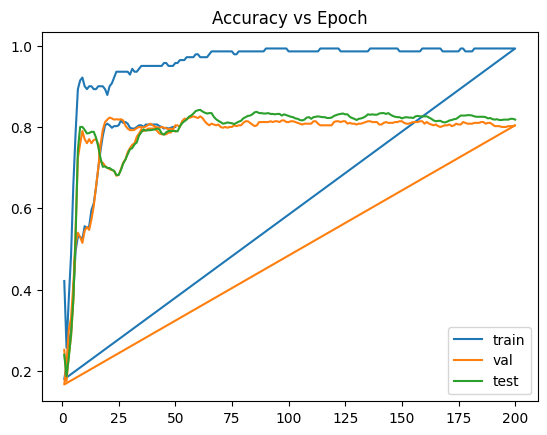

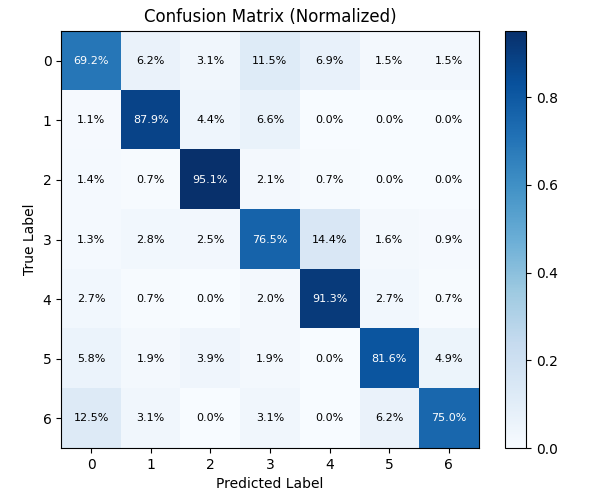

In [7]:
!python -m graph_attention_networks.cli eval --model models/gat_cora.pt

# Show learning curve and confusion matrix inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image, display

df = pd.read_csv("results/metrics_epoch.csv")
plt.figure()
plt.plot(df["epoch"], df["acc_train"], label="train")
plt.plot(df["epoch"], df["acc_val"], label="val")
plt.plot(df["epoch"], df["acc_test"], label="test")
plt.title("Accuracy vs Epoch"); plt.legend(); plt.show()

display(Image(filename="results/confusion_matrix.png"))
